# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

**1)** Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('previsao_de_renda.csv')
df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


C:\Users\Cris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


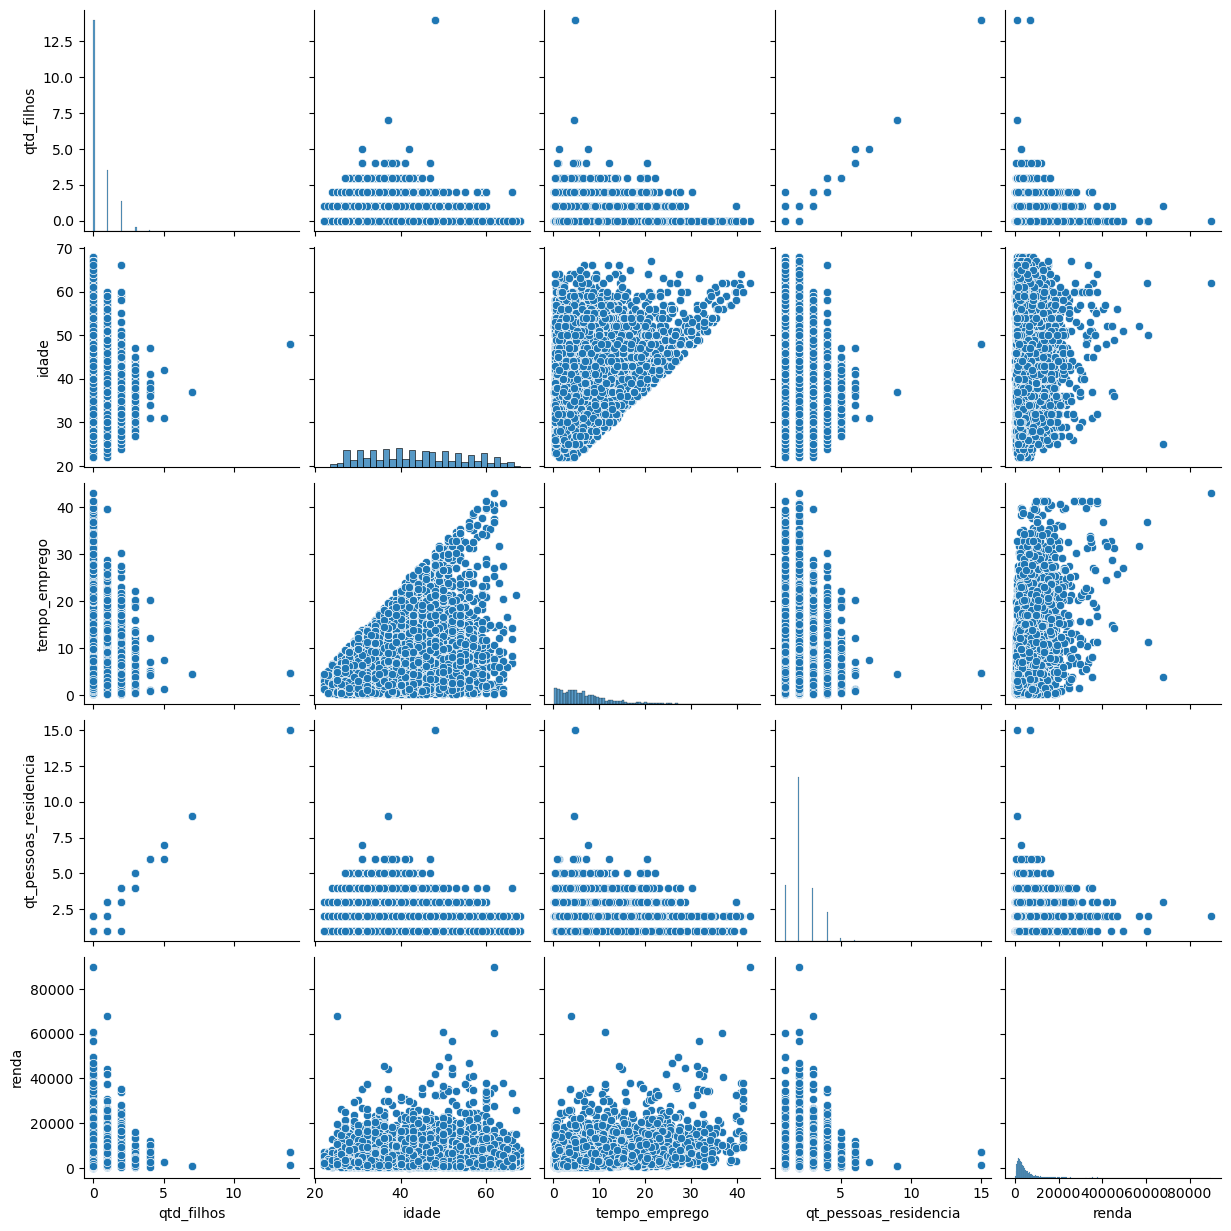

In [8]:
sns.pairplot(df, vars=['qtd_filhos','idade','tempo_emprego','qt_pessoas_residencia','renda'])
plt.show()

In [9]:
variaveis = df[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']]
variaveis.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


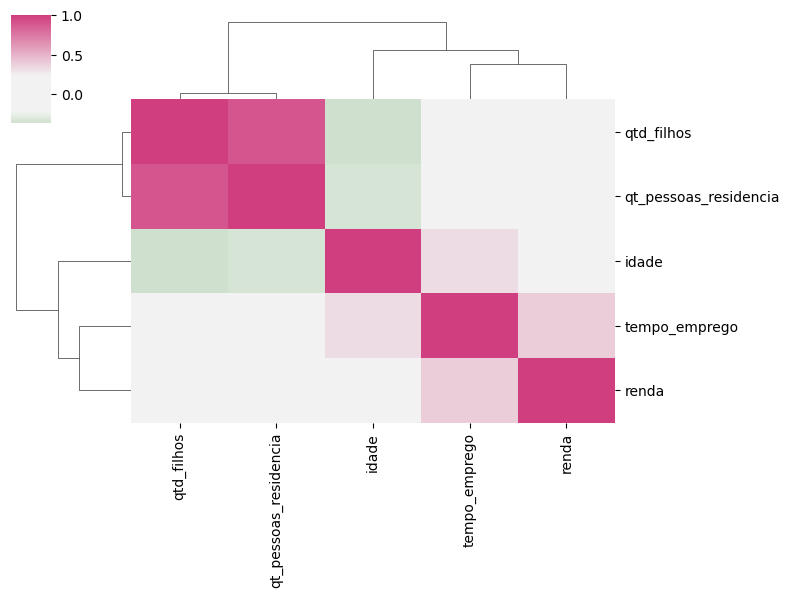

In [19]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')
sns.clustermap(variaveis.corr(), figsize=(8, 6), center = 0, cmap=cmap,)

# annot=True,   fmt=".2f" -> mostra os valores e formata


**Análise:**
Observamos que a correlação entre as varivéis idade e qtde filho são negativas,
assim como a idade e qtde pessoas residência. 
O tempo de emprego tem correlação positiva com renda e idade. 

**2)** Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

**Tempo de emprego vs Renda:**

<Axes: xlabel='renda', ylabel='tempo_emprego'>

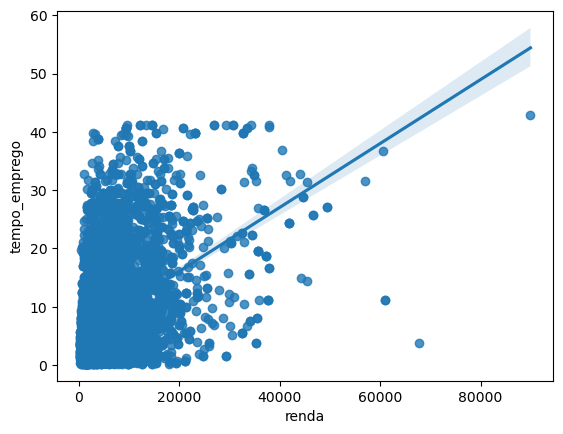

In [22]:
sns.regplot(y='tempo_emprego', x='renda', data = df)

...

**Idade vs Renda:**

<Axes: xlabel='renda', ylabel='idade'>

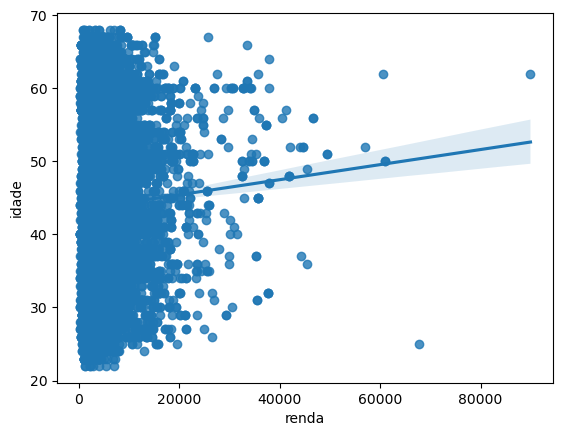

In [21]:
sns.regplot(y='idade', x='renda', data = df)

 ....

3) Na su aopinião, há outliers na variável renda?

    Devido a natureza da variável é bem possivel que ocorra.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [23]:
df['renda_log'] = np.log(df['renda'])

<Axes: xlabel='renda_log', ylabel='tempo_emprego'>

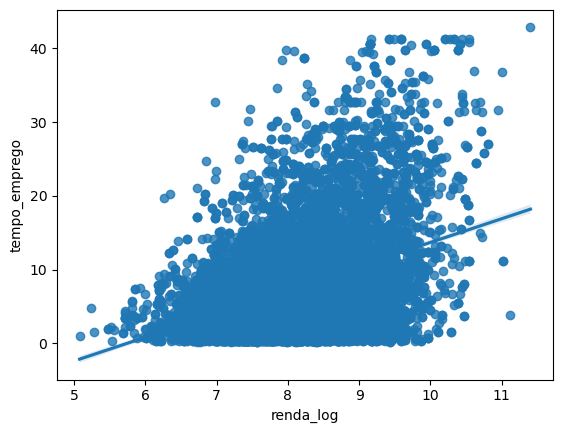

In [24]:
sns.regplot(y='tempo_emprego', x='renda_log', data = df)

<Axes: xlabel='renda_log', ylabel='idade'>

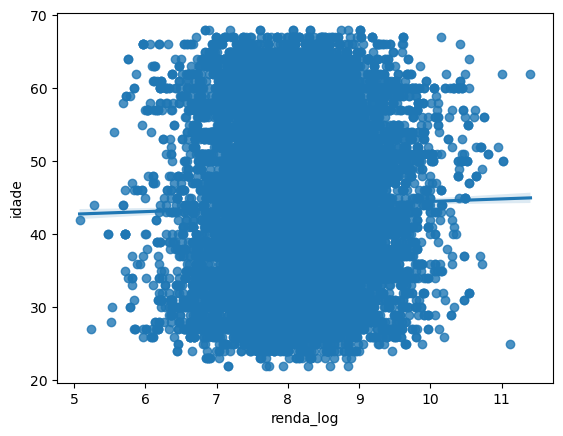

In [25]:
sns.regplot(y='idade', x='renda_log', data = df)

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Acredito ter ajudado um pouco no gráfico de tempo de emprego mas ainda é grande a dispersão.
No gráfico de renda e idade não melhorou.

Por favor me corija se eu estiver errada em alguma análise...

